In [1]:
import matplotlib.pyplot as plt # like in matlab (also "seaborn" for plotting)
import numpy as np

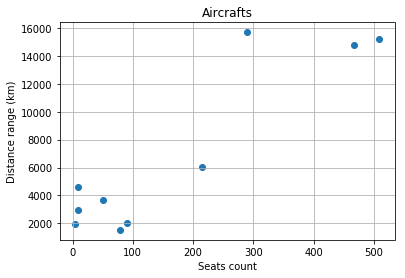

In [2]:
X=np.array([(4,1940),(9,2960),(9,4630),(78,1528),(90,2040),(50,3700),(467,14815),(509,15200),(290,15700),(215,6045)])

x1 = np.array(X[:,0])
x2 = np.array(X[:,1])

fig, ax = plt.subplots()
ax.scatter(x1,x2)
ax.set(xlabel='Seats count', ylabel='Distance range (km)',
       title='Aircrafts')
ax.grid()
plt.show()

In [3]:
#normalizing data
train_data = np.array(X)
max_values = train_data.max(0)

X_norm = np.divide(train_data,max_values)

In [4]:
print(X_norm)

[[0.00785855 0.12356688]
 [0.01768173 0.18853503]
 [0.01768173 0.29490446]
 [0.15324165 0.09732484]
 [0.17681729 0.12993631]
 [0.09823183 0.23566879]
 [0.91748527 0.94363057]
 [1.         0.96815287]
 [0.5697446  1.        ]
 [0.42239686 0.38503185]]


In [5]:
import random
data_set = X_norm
groups = 2
space=[[0,1],[0,1]]

error_margin = 0.00001
m = 2.0 # fixed value, parameter, usually 2

#assignation matrix set to something close to zero at the beginning
assignation = (np.random.rand(len(X),groups) + 0.01) / 10
print(assignation)

[[0.02008875 0.02799852]
 [0.03486954 0.08368249]
 [0.01867634 0.05759692]
 [0.07179944 0.02815377]
 [0.09408543 0.05692665]
 [0.08814005 0.09210932]
 [0.04341373 0.0496148 ]
 [0.03416655 0.09348721]
 [0.01685898 0.0766887 ]
 [0.05497012 0.04166928]]


In [6]:
centers = []

def select_centers():
    global centers
    global groups
    global space
    iter = 0
    while iter < groups:
        centers.append((random.uniform(space[0][0],space[0][1]), 
                        random.uniform(space[1][0],space[1][1])))
        iter=iter+1
        
select_centers()

In [7]:
print(centers)

[(0.9993810985175123, 0.859501575954175), (0.08504708859637289, 0.882584343319098)]


In [8]:
global inv_covariance
covariance = np.cov(X_norm[:,0], X_norm[:,1], rowvar=0)
inv_covariance = np.linalg.inv(covariance)
print(covariance)
print(inv_covariance)

[[0.1407423  0.1289333 ]
 [0.1289333  0.14320383]]
[[ 40.5557139  -36.51426257]
 [-36.51426257  39.85860298]]


In [9]:
import math

def mahalanobis_distance(x, v):
    return max(np.sqrt(np.dot(np.dot(np.transpose(x - v), inv_covariance), (x - v))), 0.00000001)

In [10]:
def calculate_u(x, i):
    global centers
        
    u_x = 0.0
    u_scalar = 0.0
    for j in range(len(data_set)):
        u_scalar = u_scalar + (assignation[j][i]**m)
        u_x = u_x + ((assignation[j][i]**m) * (mahalanobis_distance(X_norm[j], centers[i])**2))
    eta_i = u_x / u_scalar
    
    suma = 1.0 + ((mahalanobis_distance(x, centers[i]) / eta_i)**(2/(m-1)))
    print('sum: ', suma**-1)
    return suma**-1

In [11]:
def calculate_new_centers(u):
    global centers
    new_centers = []
    for c in range(groups):
        u_x_vector = np.zeros(2)
        u_scalar = 0.0
        for i in range(len(data_set)):
            u_scalar = u_scalar + (u[i][c]**m)
            u_x_vector = np.add(u_x_vector, np.multiply(u[i][c]**m, data_set[i]))
        new_centers.append(np.divide(u_x_vector, u_scalar))
    centers = new_centers
    print(centers)

In [12]:
def calculate_differences(new_assignation):
    global assignation    
    return np.sum(np.abs(np.subtract(assignation,new_assignation)))

In [13]:
def cluster():
    global assignation    
    global error_margin
    difference_limit_not_achieved = True
    iter = 0
    while difference_limit_not_achieved:
        new_assignation = []
        for i in range(len(data_set)):
            new_assignation_vector = []
            for k in range(groups):
                new_assignation_vector.append(calculate_u(data_set[i], k))
            new_assignation.append(new_assignation_vector)
        calculate_new_centers(new_assignation)
        
        #print('assignation: ', assignation)
        if iter > 0:
            print(calculate_differences(new_assignation))
            if calculate_differences(new_assignation) < error_margin:
                difference_limit_not_achieved = False
        assignation = new_assignation
        iter = iter + 1

In [14]:
cluster()

sum:  0.7410791561318536
sum:  0.7902820932027596
sum:  0.7358214765050185
sum:  0.7560276052670117
sum:  0.6989298512200618
sum:  0.6455565407340434
sum:  0.7818959397576425
sum:  0.8677991614229585
sum:  0.7946334770760212
sum:  0.8872955699953438
sum:  0.7740212684803307
sum:  0.8223570762777116
sum:  0.9984993132064953
sum:  0.8227854023098469
sum:  0.9964480772572036
sum:  0.7849131634566074
sum:  0.7049587542012375
sum:  0.4742376933834666
sum:  0.8933872504683507
sum:  0.9859307013068119
[array([0.41971461, 0.49255525]), array([0.33536651, 0.39200059])]
sum:  0.7048765939045959
sum:  0.6688071831189207
sum:  0.6571261346989593
sum:  0.5932493346750688
sum:  0.5209313189475987
sum:  0.421624127967646
sum:  0.8134000962731692
sum:  0.8196054557612166
sum:  0.8415470378348999
sum:  0.8563960368147729
sum:  0.7444465287340026
sum:  0.7007156643870064
sum:  0.7037510746445915
sum:  0.5021479108819835
sum:  0.6542273452527161
sum:  0.4542463466889702
sum:  0.33844078739768935
sum:  0.

In [15]:
print(centers)

[array([0.16965376, 0.12656855]), array([0.16965376, 0.12656854])]


In [16]:
print(assignation)

[[0.030379917435998157, 0.03037986377737814], [0.015433085761591796, 0.01543305742288284], [0.0060275468079003585, 0.006027535525579546], [0.1269503269469135, 0.12695012551081478], [0.1742530405060889, 0.17425276431330217], [0.024043524141788362, 0.024043479775818548], [0.0039263402741760885, 0.00392633263449344], [0.003412587103823061, 0.0034125804766241886], [0.0018009948186979096, 0.0018009913868693712], [0.03187722361216675, 0.031877159564183216]]


In [17]:
red = X_norm[np.where(np.array(assignation)[:,0] > np.array(assignation)[:,1])]
blue = X_norm[np.where(np.array(assignation)[:,1] > np.array(assignation)[:,0])]

#red = X_norm[np.where(np.array(assignation)[:,0] > np.array(assignation)[:,1]) and np.where(np.array(assignation)[:,0] > np.array(assignation)[:,2])]
#blue = X_norm[np.where(np.array(assignation)[:,1] > np.array(assignation)[:,0]) and np.where(np.array(assignation)[:,1] > np.array(assignation)[:,2])]
#orange = X_norm[np.where(np.array(assignation)[:,2] > np.array(assignation)[:,0]) and np.where(np.array(assignation)[:,2] > np.array(assignation)[:,1])]

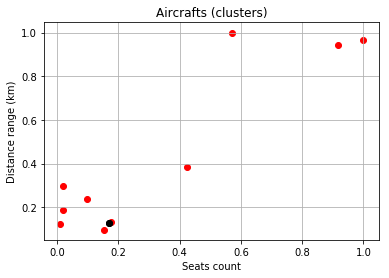

In [18]:
fig, ax = plt.subplots()

ax.scatter(blue[:,0],blue[:,1],c='blue')
ax.scatter(red[:,0],red[:,1],c='red')
#ax.scatter(orange[:,0],orange[:,1],c='orange')
ax.scatter(np.array(centers)[:,0],np.array(centers)[:,1],c='black')
ax.set(xlabel='Seats count', ylabel='Distance range (km)',
       title='Aircrafts (clusters)')
ax.grid()
plt.show()